In [13]:
#%reset
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
#import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
#from IPython.display import HTML
import matplotlib
#import matplotlib.animation as animation
#matplotlib.rcParams['animation.embed_limit'] =1e12
from xgcm import Grid

In [14]:
# Gustavo's default KHTH=300
# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/KHTH_constant/nw2_0.5deg_N15_KHTH300 
# fs= xr.open_dataset('static.nc', decode_times=False)
# av = xr.open_dataset('averages_00032002.nc',decode_times=False)

# Gustavo's default KHTH=2000
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/KHTH_constant/nw2_0.5deg_N15_KHTH2000
fs= xr.open_dataset('static.nc', decode_times=False)
av = xr.open_dataset('averages_00032002.nc',decode_times=False)
os = xr.open_dataset('ocean.stats.nc',decode_times=False)


# # MY default KHTH=300 (should be copy of Gustavo's above, just a sanity check since it was my first run)
# %cd /glade/p/univ/unyu0004/eyankovsky/example_elizabeth
# fs= xr.open_dataset('static.nc', decode_times=False)
# av = xr.open_dataset('averages_00031502.nc',decode_times=False)
# os = xr.open_dataset('ocean.stats.nc',decode_times=False)

# #PARAMETERIZED GME RUNS:
# %cd /glade/p/univ/unyu0004/eyankovsky/Bachman2019_attempt1
# fs= xr.open_dataset('static.nc', decode_times=False)
# av = xr.open_dataset('averages_00031502.nc',decode_times=False)
# os = xr.open_dataset('ocean.stats.nc',decode_times=False)

# %cd /glade/p/univ/unyu0004/eyankovsky/Bachman2019_KHTH500_C01
# fs= xr.open_dataset('static.nc', decode_times=False)
# av = xr.open_mfdataset(['averages_00030002.nc','averages_00030502.nc','averages_00031002.nc','averages_00031502.nc'],decode_times=False)
# os = xr.open_dataset('ocean.stats.nc',decode_times=False)

# %cd /glade/p/univ/unyu0004/eyankovsky/Bachman2019_KHTH500_C1
# %ls
# fs= xr.open_dataset('static.nc', decode_times=False)
# av = xr.open_mfdataset(['averages_00030002.nc','averages_00030502.nc','averages_00031002.nc','averages_00031502.nc'],decode_times=False)
# os = xr.open_dataset('ocean.stats.nc',decode_times=False)

# %cd /glade/p/univ/unyu0004/eyankovsky/Bachman2019_KHTH500_default
# fs= xr.open_dataset('static.nc', decode_times=False)
# av = xr.open_mfdataset(['averages_00030002.nc','averages_00030502.nc','averages_00031002.nc','averages_00031502.nc'],decode_times=False)
# os = xr.open_dataset('ocean.stats.nc',decode_times=False)


# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.0625deg_N15_baseline/
# fs = xr.open_dataset('static.nc', decode_times=False)
# os = xr.open_dataset('ocean.stats.nc', decode_times=False)
# av = xr.open_dataset('averages_00006002.nc', decode_times=False)

#%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/gmarques/NeverWorld2/KHTH_constant/nw2_0.5deg_N15_KHTH2000


In [15]:
print(av.h)

<xarray.DataArray 'h' (time: 100, zl: 15, yh: 280, xh: 120)>
[50400000 values with dtype=float32]
Coordinates:
  * xh       (xh) float64 0.25 0.75 1.25 1.75 2.25 ... 58.25 58.75 59.25 59.75
  * yh       (yh) float64 -69.75 -69.25 -68.75 -68.25 ... 68.75 69.25 69.75
  * zl       (zl) float64 1.023e+03 1.023e+03 1.023e+03 ... 1.028e+03 1.028e+03
  * time     (time) float64 3.2e+04 3.201e+04 3.201e+04 ... 3.249e+04 3.25e+04
Attributes:
    long_name:      Layer Thickness
    units:          m
    cell_methods:   area:mean zl:sum yh:mean xh:mean time: mean
    cell_measures:  area: area_t
    time_avg_info:  average_T1,average_T2,average_DT


In [16]:
av = av.astype(np.float64)

### Option 1: the crazy one

In [17]:
eta = av.h.sum('zl')-(av.h.sum('zl')).mean('time')
eta_mean = eta.mean(dim='time')

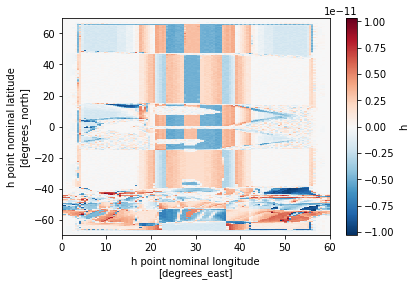

In [18]:
eta_mean.plot()

### Option 2: Reduce order of magnitude of numerics first to avoid crazy roundoff errors

In [19]:
eta = av.h.sum(dim='zl') - fs.depth_ocean
eta_mean = eta.mean(dim='time')

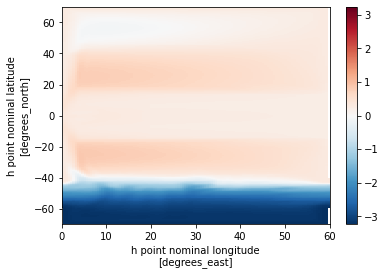

In [20]:
eta_mean.plot()

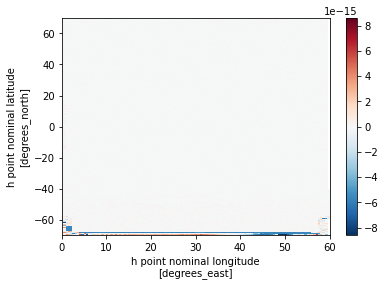

In [21]:
(eta - eta_mean).mean(dim='time').plot()